In [81]:
#!/usr/bin/python
# encoding=utf8

import matplotlib.pyplot as plt
import numpy as np
from scipy import polyval, polyfit
from scipy.optimize import curve_fit

### external codes
from redTools import *
from Kcorrect import *
  
########################################################### Begin

inFile  = 'ESN_HI_catal.csv'   # input catalog
table   = np.genfromtxt(inFile , delimiter=',', filling_values=-1, names=True, dtype=None)

table = extinctionCorrect(table)
table = Kcorrection(table)

## purifying input data
index, = np.where(table['Sba']>0.01)
table = trim(table, index)

index, = np.where(table['Wba']>0.01)
table = trim(table, index)

index, = np.where(table['R50_g']>0)
table = trim(table, index)

index, = np.where(table['R50_r']>0)
table = trim(table, index)

index, = np.where(table['R50_i']>0)
table = trim(table, index)

index, = np.where(table['R50_z']>0)
table = trim(table, index)

index, = np.where(table['R50_w1']>0)
table = trim(table, index)

Sba = table['Sba']  # SDSS b/a
Wba = table['Wba']  # WISE b/a
Re_g = table['R50_g'] #half light radius for different bands
Re_r = table['R50_r']
Re_i = table['R50_i']
Re_z = table['R50_z']
Re_w1 = table['R50_w1']
Re_w2 = table['R50_w2']
Re_i_z = (1./2)*(Re_i + Re_z) #i+z half light radius

Text(0,0.5,'$R_e$ WISE w1-band [arcmin]')

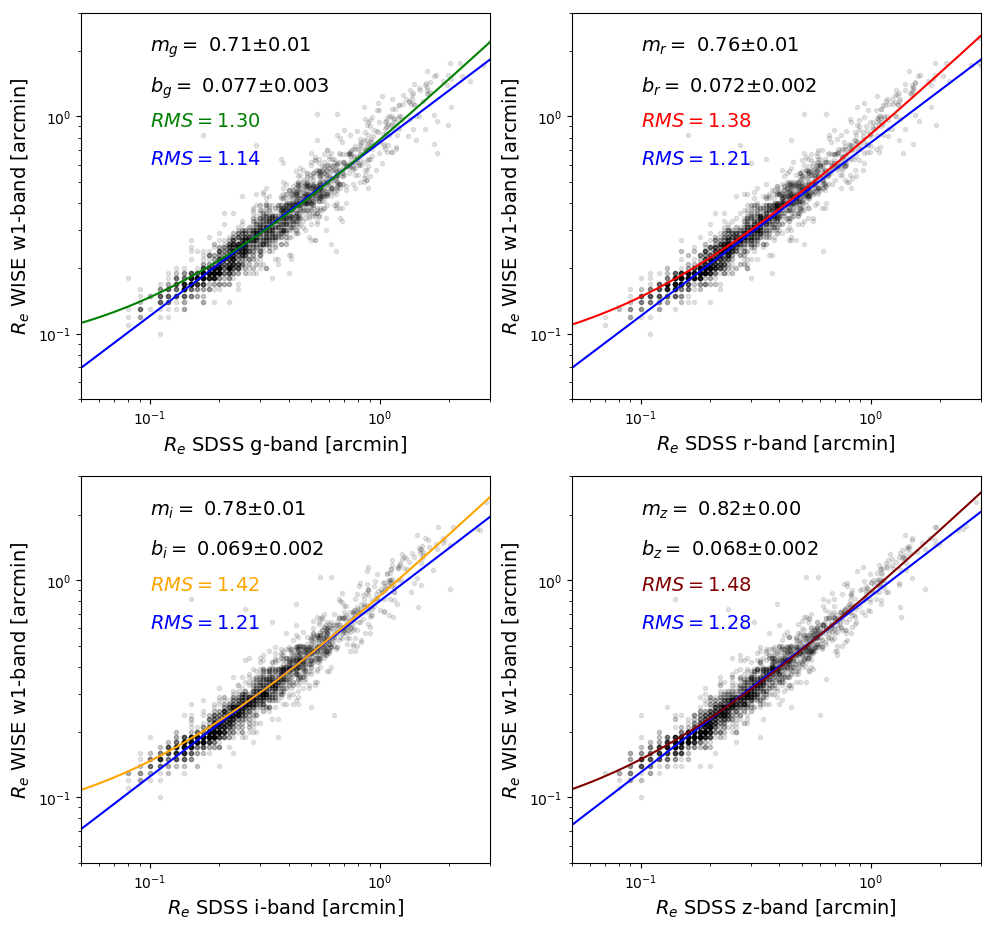

In [85]:
## defining the linear fit
def linfit(x, m, b):
    return m * x + b

def rms(x):
    return np.sqrt(np.sum(x**2)/len(x))

fit_g, cov_g = curve_fit(linfit, Re_g, Re_w1, p0=[1, 2])
fit_r, cov_r = curve_fit(linfit, Re_r, Re_w1, p0=[1, 2])
fit_i, cov_i = curve_fit(linfit, Re_i, Re_w1, p0=[1, 2])
fit_z, cov_z = curve_fit(linfit, Re_z, Re_w1, p0=[1, 2])

logFit_g, logcov_g = curve_fit(linfit, np.log10(Re_g), np.log10(Re_w1), p0=[1, 2])
logFit_r, logcov_r = curve_fit(linfit, np.log10(Re_r), np.log10(Re_w1), p0=[1, 2])
logFit_i, logcov_i = curve_fit(linfit, np.log10(Re_r), np.log10(Re_w1), p0=[1, 2])
logFit_z, logcov_z = curve_fit(linfit, np.log10(Re_z), np.log10(Re_w1), p0=[1, 2])

#print 'g: ', fit_g, cov_g
#print 'r: ', fit_r, cov_r
#print 'i: ', fit_i, cov_i
#print 'z: ', fit_z, cov_z

#a0, b0 = np.polyfit(Re_g, Re_w1, 1)

x = np.linspace(0.02,3,1000)

fig = py.figure(figsize=(10, 10), dpi=100)    
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.95, bottom=0.10, left=0.08, right=0.98) 
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1]) 
p = 0

########
ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_g, Re_w1, c='k', alpha=0.1, marker='.') # black points
ax.plot(x, 10**(logFit_g[0]*np.log10(x)+logFit_g[1]), 'blue')
ax.plot(x, fit_g[0]*x+fit_g[1], 'g', label='Linear Trend')

ax.text(0.1,2., '$m_g=$ '+'%.2f'%fit_g[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_g[0][0]), fontsize=14, color='k')
ax.text(0.1,1.3, r'$b_g=$ '+'%.3f'%fit_g[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_g[1][1]), fontsize=14, color='k')
ax.text(0.1,0.9, '$RMS=$'+'%.2f'%rms(fit_g[0]*x+fit_g[1]), fontsize=14, color='g')
ax.text(0.1,0.6, '$RMS=$'+'%.2f'%rms(10**(logFit_g[0]*np.log10(x)+logFit_g[1])), fontsize=14, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.05,3])
ax.set_ylim([0.05,3])
ax.set_xlabel('$R_e$'+' SDSS g-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)
#ax.legend()

#########
ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_r, Re_w1, c='k', alpha=0.1, marker='.') # black points
ax.plot(x, 10**(logFit_g[0]*np.log10(x)+logFit_g[1]), 'blue')
ax.plot(x, fit_r[0]*x+fit_r[1], 'r', label='Linear Trend')

ax.text(0.1,2., '$m_r=$ '+'%.2f'%fit_r[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_r[0][0]), fontsize=14, color='k')
ax.text(0.1,1.3, r'$b_r=$ '+'%.3f'%fit_r[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_r[1][1]), fontsize=14, color='k')
ax.text(0.1,0.9, '$RMS=$'+'%.2f'%rms(fit_r[0]*x+fit_r[1]), fontsize=14, color='r')
ax.text(0.1,0.6, '$RMS=$'+'%.2f'%rms(10**(logFit_r[0]*np.log10(x)+logFit_r[1])), fontsize=14, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.05,3])
ax.set_ylim([0.05,3])
ax.set_xlabel('$R_e$'+' SDSS r-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

#########
ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_i, Re_w1, c='k', alpha=0.1, marker='.') # black points
ax.plot(x, 10**(logFit_i[0]*np.log10(x)+logFit_i[1]), 'blue')
ax.plot(x, fit_i[0]*x+fit_i[1], 'orange', label='Linear Trend')

ax.text(0.1,2., '$m_i=$ '+'%.2f'%fit_i[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_i[0][0]), fontsize=14, color='k')
ax.text(0.1,1.3, r'$b_i=$ '+'%.3f'%fit_i[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_i[1][1]), fontsize=14, color='k')
ax.text(0.1,0.9, '$RMS=$'+'%.2f'%rms(fit_i[0]*x+fit_i[1]), fontsize=14, color='orange')
ax.text(0.1,0.6, '$RMS=$'+'%.2f'%rms(10**(logFit_i[0]*np.log10(x)+logFit_i[1])), fontsize=14, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.05,3])
ax.set_ylim([0.05,3])
ax.set_xlabel('$R_e$'+' SDSS i-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

#########
ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_z, Re_w1, c='k', alpha=0.1, marker='.') # black points
ax.plot(x, 10**(logFit_z[0]*np.log10(x)+logFit_z[1]), 'blue')
ax.plot(x, fit_z[0]*x+fit_z[1], 'maroon', label='Linear Trend')

ax.text(0.1,2., '$m_z=$ '+'%.2f'%fit_z[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_z[0][0]), fontsize=14, color='k')
ax.text(0.1,1.3, r'$b_z=$ '+'%.3f'%fit_z[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_z[1][1]), fontsize=14, color='k')
ax.text(0.1,0.9, '$RMS=$'+'%.2f'%rms(fit_z[0]*x+fit_z[1]), fontsize=14, color='maroon')
ax.text(0.1,0.6, '$RMS=$'+'%.2f'%rms(10**(logFit_z[0]*np.log10(x)+logFit_z[1])), fontsize=14, color='blue')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim([0.05,3])
ax.set_ylim([0.05,3])
ax.set_xlabel('$R_e$'+' SDSS z-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

#g vs w1

#fig = plt.figure(figsize=(5, 5))
#plt.scatter(Re_g, Re_w1, c='k', alpha=0.1, marker='.') # black points
#plt.plot(Re_g, linfit(Re_g, fit_g[0], fit_g[1]), 'b', label='Linear Trend') # blue linear fit
#plt.plot(Re_g, linfit(Re_g, fit_g[0], fit_g[1]+.5), 'g:', label='$\pm$ 0.5 arcmin') # +0.5 arcmin boundary
#plt.plot(Re_g, linfit(Re_g, fit_g[0], fit_g[1]-.5), 'g:') # -0.5 arcmin boundary
#plt.plot([0,2],[0,2], 'r--')    # equality red line

Text(0.5,0,'$R_e$ SDSS proxy [arcmin]')

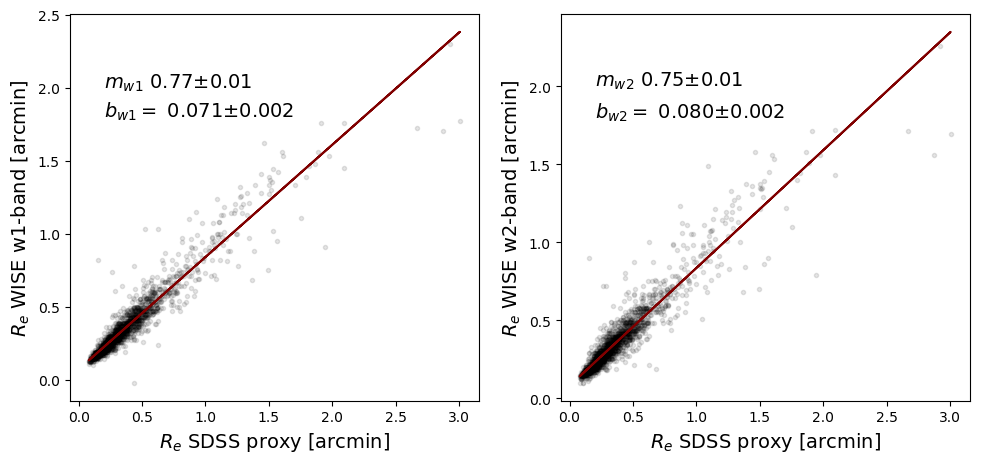

In [3]:
Y = np.ones(shape = (4,len(Re_g)))
Y[0] = Re_g
Y[1] = Re_r
Y[2] = Re_i
Y[3] = Re_z
Re_prox = np.median(Y.T,1)

fit_prox, cov_prox = curve_fit(linfit, Re_prox, Re_w1, p0=[1, 2])
fit_prox_w2, cov_prox_w2 = curve_fit(linfit, Re_prox, Re_w2, p0=[1, 2])

fig = py.figure(figsize=(10, 10), dpi=100)    
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.95, bottom=0.10, left=0.08, right=0.98) 
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1]) 
p = 0

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_prox, Re_w1, c='k', alpha=0.1, marker='.') # black points
ax.text(0.2,2., '$m_{w1}$ '+'%.2f'%fit_prox[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_prox[0][0]), fontsize=14, color='k')
ax.text(0.2,1.8, r'$b_{w1}=$ '+'%.3f'%fit_prox[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_prox[1][1]), fontsize=14, color='k')
ax.plot(Re_prox, linfit(Re_prox, fit_prox[0], fit_prox[1]), 'maroon', label='Linear Trend')
ax.set_ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)
ax.set_xlabel('$R_e$'+' SDSS proxy [arcmin]', size=14)

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_prox, Re_w2, c='k', alpha=0.1, marker='.') # black points
ax.text(0.2,2., '$m_{w2}$ '+'%.2f'%fit_prox_w2[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_prox_w2[0][0]), fontsize=14, color='k')
ax.text(0.2,1.8, r'$b_{w2}=$ '+'%.3f'%fit_prox_w2[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_prox[1][1]), fontsize=14, color='k')
ax.plot(Re_prox, linfit(Re_prox, fit_prox_w2[0], fit_prox_w2[1]), 'maroon', label='Linear Trend')
ax.set_ylabel('$R_e$'+' WISE w2-band [arcmin]', size=14)
ax.set_xlabel('$R_e$'+' SDSS proxy [arcmin]', size=14)

Text(0,0.5,'$R_e$ SDSS proxy [arcmin]')

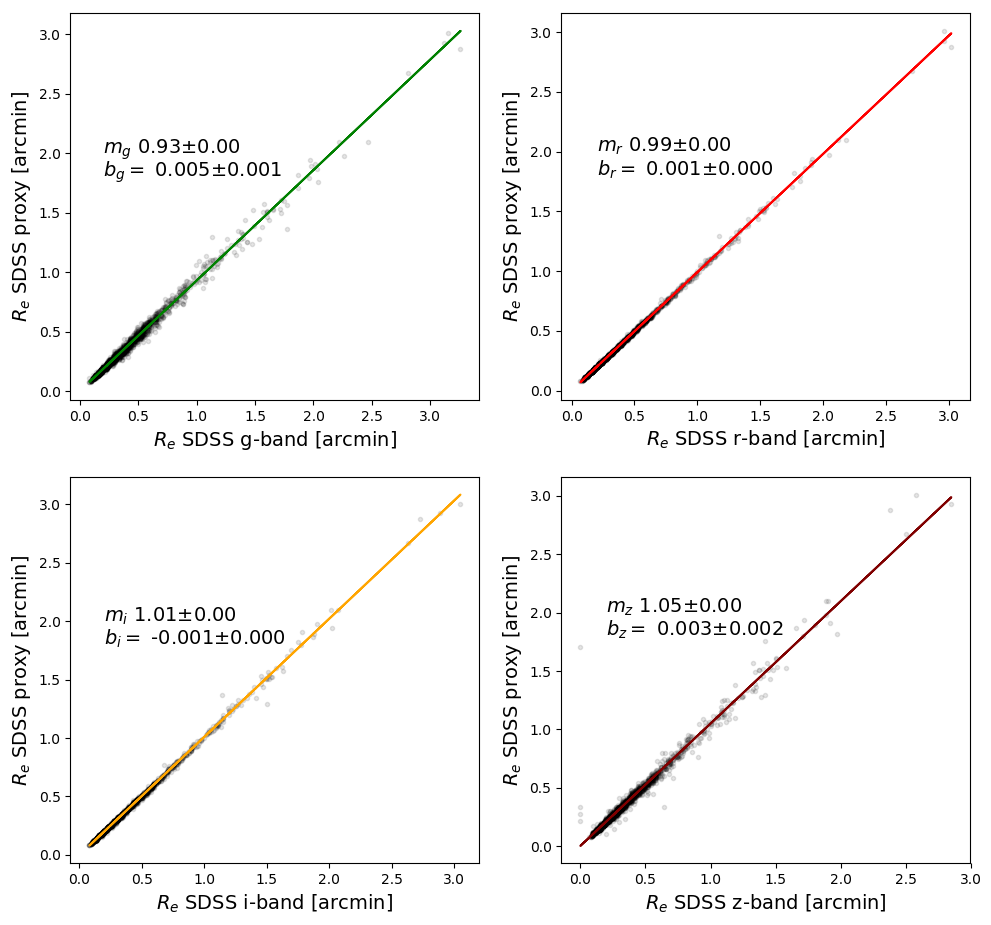

In [4]:
fit_prox_g, cov_prox_g = curve_fit(linfit, Re_g, Re_prox, p0=[1, 2])
fit_prox_r, cov_prox_r = curve_fit(linfit, Re_r, Re_prox, p0=[1, 2])
fit_prox_i, cov_prox_i = curve_fit(linfit, Re_i, Re_prox, p0=[1, 2])
fit_prox_z, cov_prox_z = curve_fit(linfit, Re_z, Re_prox, p0=[1, 2])

fig = py.figure(figsize=(10, 10), dpi=100)    
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.95, bottom=0.10, left=0.08, right=0.98) 
gs = gridspec.GridSpec(2, 2, height_ratios=[1,1]) 
p = 0

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_g, Re_prox, c='k', alpha=0.1, marker='.') # black points
ax.text(0.2,2., '$m_{g}$ '+'%.2f'%fit_prox_g[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_prox_g[0][0]), fontsize=14, color='k')
ax.text(0.2,1.8, r'$b_g=$ '+'%.3f'%fit_prox_g[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_prox_g[1][1]), fontsize=14, color='k')
ax.plot(Re_g, linfit(Re_g, fit_prox_g[0], fit_prox_g[1]), 'g', label='Linear Trend')
ax.set_xlabel('$R_e$'+' SDSS g-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' SDSS proxy [arcmin]', size=14)

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_r, Re_prox, c='k', alpha=0.1, marker='.') # black points
ax.text(0.2,2., '$m_{r}$ '+'%.2f'%fit_prox_r[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_prox_r[0][0]), fontsize=14, color='k')
ax.text(0.2,1.8, r'$b_r=$ '+'%.3f'%fit_prox_r[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_prox_r[1][1]), fontsize=14, color='k')
ax.plot(Re_r, linfit(Re_r, fit_prox_r[0], fit_prox_r[1]), 'r', label='Linear Trend')
ax.set_xlabel('$R_e$'+' SDSS r-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' SDSS proxy [arcmin]', size=14)

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_i, Re_prox, c='k', alpha=0.1, marker='.') # black points
ax.text(0.2,2., '$m_{i}$ '+'%.2f'%fit_prox_i[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_prox_i[0][0]), fontsize=14, color='k')
ax.text(0.2,1.8, r'$b_i=$ '+'%.3f'%fit_prox_i[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_prox_i[1][1]), fontsize=14, color='k')
ax.plot(Re_i, linfit(Re_i, fit_prox_i[0], fit_prox_i[1]), 'orange', label='Linear Trend')
ax.set_xlabel('$R_e$'+' SDSS i-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' SDSS proxy [arcmin]', size=14)

ax = plt.subplot(gs[p]) ; p+=1
ax.scatter(Re_z, Re_prox, c='k', alpha=0.1, marker='.') # black points
ax.text(0.2,2., '$m_{z}$ '+'%.2f'%fit_prox_z[0]+r'$\pm$'+'%.2f'%np.sqrt(cov_prox_z[0][0]), fontsize=14, color='k')
ax.text(0.2,1.8, r'$b_z=$ '+'%.3f'%fit_prox_z[1]+r'$\pm$'+'%.3f'%np.sqrt(cov_prox_z[1][1]), fontsize=14, color='k')
ax.plot(Re_z, linfit(Re_z, fit_prox_z[0], fit_prox_z[1]), 'maroon', label='Linear Trend')
ax.set_xlabel('$R_e$'+' SDSS z-band [arcmin]', size=14)
ax.set_ylabel('$R_e$'+' SDSS proxy [arcmin]', size=14)


Text(0,0.5,'$R_e$ WISE w1-band [arcmin]')

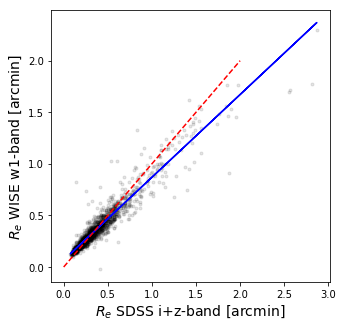

In [5]:
fit_i_z, izfitcov = curve_fit(linfit, Re_i_z, Re_w1, p0=[1, 2])

#i+z vs w1
fig = plt.figure(figsize=(5, 5))
plt.scatter(Re_i_z, Re_w1, c='k', alpha=0.1, marker='.') # black points
plt.plot(Re_i_z, linfit(Re_i_z, fit_i_z[0], fit_i_z[1]), 'b') # blue linear fit
plt.plot([0,2],[0,2], 'r--')    # equality red line

plt.xlabel('$R_e$'+' SDSS i+z-band [arcmin]', size=14)
plt.ylabel('$R_e$'+' WISE w1-band [arcmin]', size=14)

In [6]:

x = np.linspace(0,2,1)
y = a0*x+b0
ax.plot(x, y, 'b--')
a0.shape

()

In [74]:
10**(logFit[0]*np.log10(x)+logFit[1])

array([0.03344547, 0.0373716 , 0.04119602, 0.04493267, 0.04859235,
       0.05218364, 0.05571352, 0.05918777, 0.06261124, 0.06598805,
       0.06932176, 0.07261545, 0.07587182, 0.07909327, 0.08228191,
       0.08543965, 0.08856817, 0.09166903, 0.09474362, 0.09779322,
       0.10081898, 0.10382198, 0.10680321, 0.10976356, 0.11270389,
       0.11562497, 0.11852753, 0.12141225, 0.12427977, 0.12713067,
       0.12996552, 0.13278484, 0.13558912, 0.13837884, 0.14115442,
       0.14391629, 0.14666483, 0.14940043, 0.15212344, 0.1548342 ,
       0.15753303, 0.16022023, 0.16289609, 0.1655609 , 0.16821493,
       0.17085842, 0.17349163, 0.17611478, 0.1787281 , 0.18133181,
       0.18392611, 0.1865112 , 0.18908728, 0.19165452, 0.19421312,
       0.19676322, 0.19930501, 0.20183864, 0.20436427, 0.20688203,
       0.20939208, 0.21189456, 0.2143896 , 0.21687733, 0.21935787,
       0.22183134, 0.22429788, 0.22675758, 0.22921056, 0.23165694,
       0.2340968 , 0.23653027, 0.23895742, 0.24137837, 0.24379